# Predicting Heart Disease using machine learning


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

    id (Unique id for each patient)
    age (Age of the patient in years)
    origin (place of study)
    sex (Male/Female)
    cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    chol (serum cholesterol in mg/dl)
    fbs (if fasting blood sugar > 120 mg/dl)
    restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (True/ False)
    oldpeak: ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    ca: number of major vessels (0-3) colored by fluoroscopy
    thal: [normal; fixed defect; reversible defect]
    num: the predicted attribute


# load data


In [2]:
df = pd.read_csv("data/data.csv")
df.shape

(303, 14)

In [3]:
#EDA

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

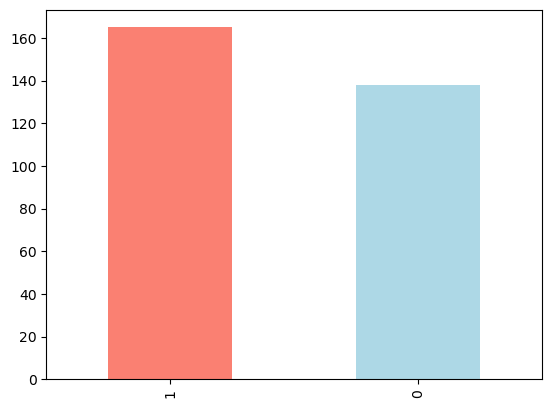

In [6]:
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease frequency according to Sex


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

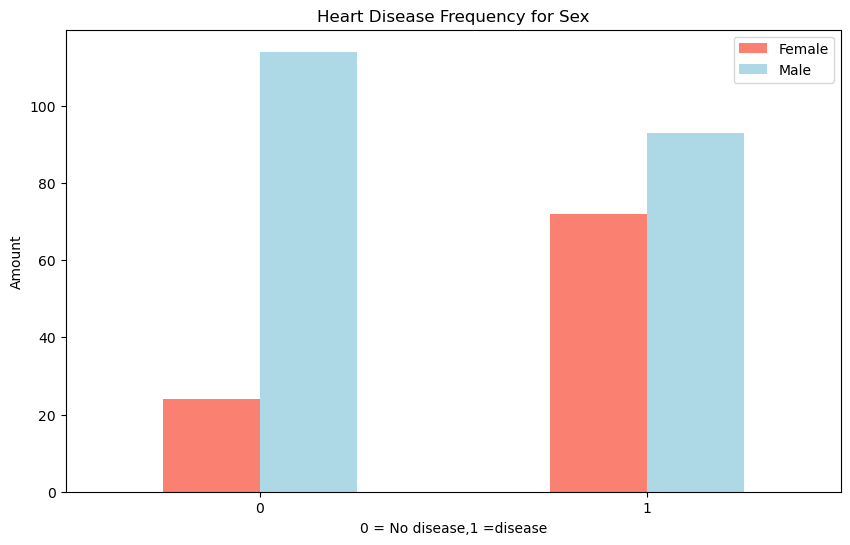

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease,1 =disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### Comparing thalach with target

### Age vs Max heart rate for Heart disease

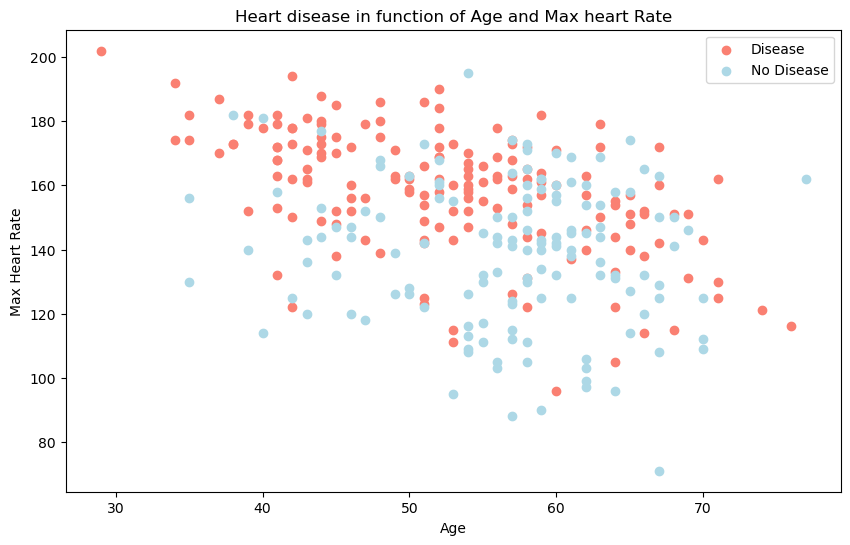

In [13]:
plt.figure(figsize=(10,6))

# Scatter with positive examples

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c="salmon"
               )
#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
df.thalach[df.target == 0],
c = "lightblue"
)

plt.title("Heart disease in function of Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])



Note : Younger someone - is - higher heart rate

The pattern you cant neccessarily see , ml is going to figure out the patterns

<AxesSubplot:ylabel='Frequency'>

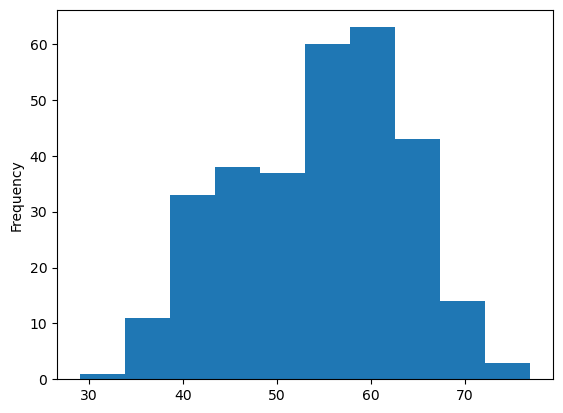

In [14]:
# Check the distribution of age column with a histogram
df.age.plot.hist()

In [15]:
# Normal distribution looks like bell curve

Note: check for outliers 

Chest pain types  and heart disease

  cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

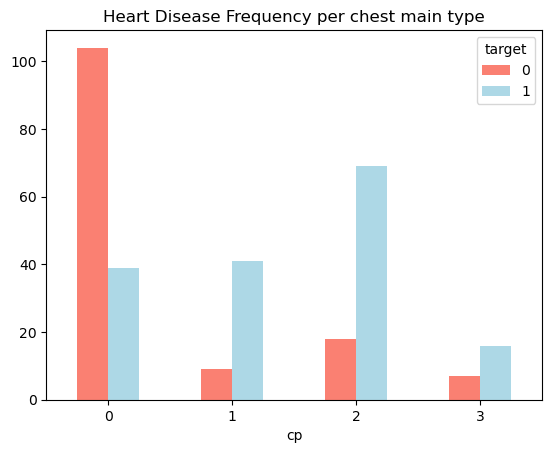

In [17]:
#Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["salmon",'lightblue'])
plt.title("Heart Disease Frequency per chest main type")
plt.xticks(rotation=0)

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Finding correlation

In [19]:
# Make a correlation matric 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


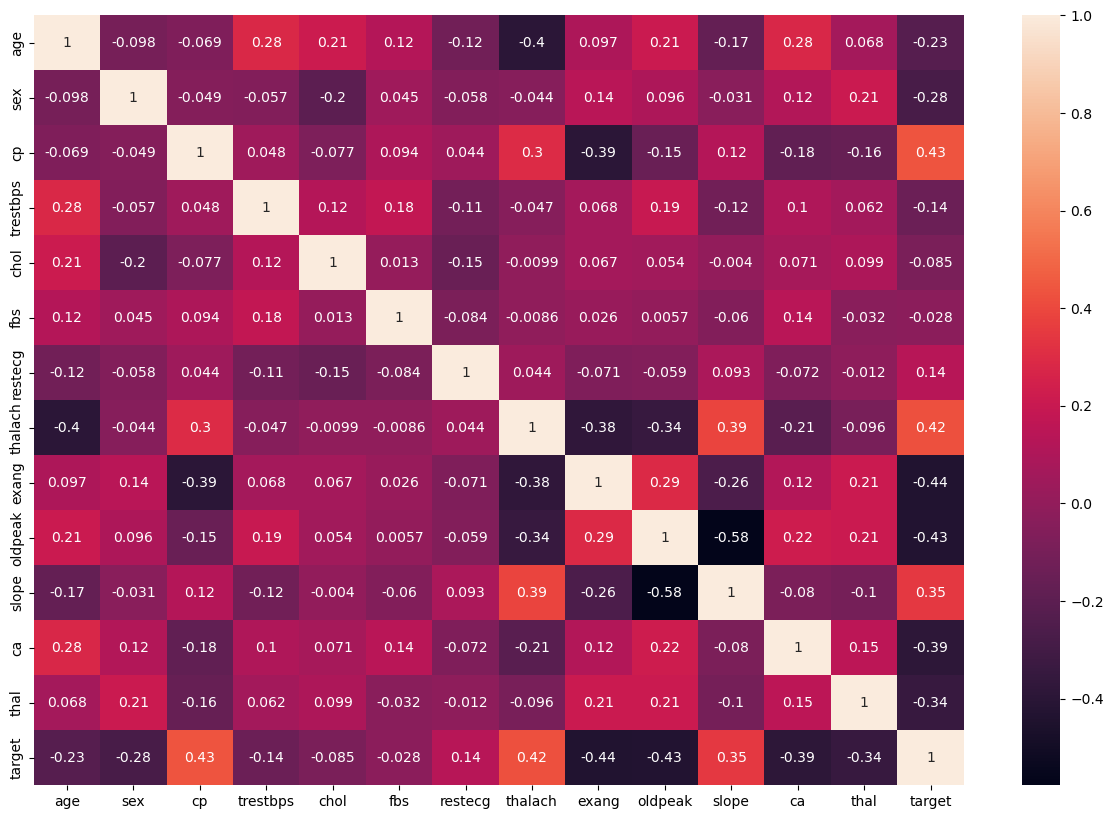

In [20]:
#Make it more visual by seaborns heat map
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(data = corr_matrix,
annot=True
)


In [21]:
#Evaluation: We need minimum 95 % accuracy

Modelling


In [22]:
#Split data into X and Y
X = df.drop("target",axis=1)

In [23]:
y = df["target"]

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
#split our data into training and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Trying out three models:

-> Logistic regression


-> K-Nearest Neighbours


-> Random Forest

In [28]:
models = {"LogisticRegression" : LogisticRegression(),
"KNN":KNeighborsClassifier(), "randomforest" :RandomForestClassifier() }

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    #Loop through models
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    return model_scores



In [29]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [30]:
model_scores

{'LogisticRegression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'randomforest': 0.8360655737704918}

Model Comparison

<AxesSubplot:>

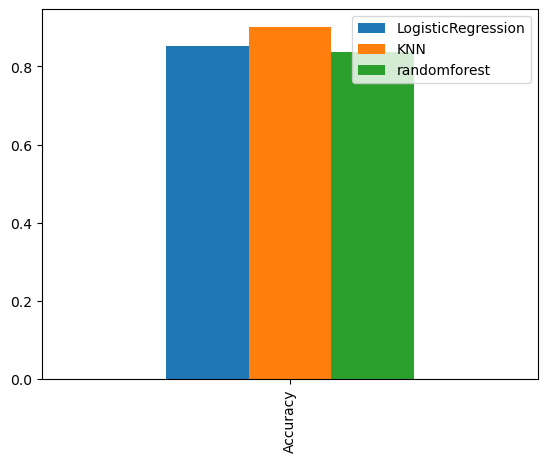

In [31]:
model_compare = pd.DataFrame(model_scores,index= ["Accuracy"])
model_compare.plot.bar()

Going to look at the following:

<font color='red'>

*Hyperparameter tuning


*Feature importance
</font>
<font color='green'>


*Confusion metrics


*Cross validation


*Precision


*Recall


*F1 score


*Classification report


*ROC curve


*Area under the curve
</font>

Hyperparameter Tuning  

In [32]:
#Tuning KNN

train_scores = []
test_scores = []

neighbors = range(1,21)
knn = KNeighborsClassifier()

#Loop through different n neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [33]:
train_scores

[1.0,
 0.8842975206611571,
 0.8884297520661157,
 0.8636363636363636,
 0.8553719008264463,
 0.8512396694214877,
 0.8677685950413223,
 0.8636363636363636,
 0.8553719008264463,
 0.8429752066115702,
 0.8347107438016529,
 0.8347107438016529,
 0.8471074380165289,
 0.8471074380165289,
 0.859504132231405,
 0.8553719008264463,
 0.8388429752066116,
 0.8553719008264463,
 0.8388429752066116,
 0.8429752066115702]

In [54]:
max(train_scores)

1.0

In [34]:
test_scores

[0.8524590163934426,
 0.819672131147541,
 0.8524590163934426,
 0.8524590163934426,
 0.9016393442622951,
 0.9016393442622951,
 0.9180327868852459,
 0.8688524590163934,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951]

In [55]:
max(test_scores)

0.9180327868852459

In [60]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(X_train,y_train)
knn_model.score(X_test,y_test)

0.9180327868852459

Maximum test score : 91.80


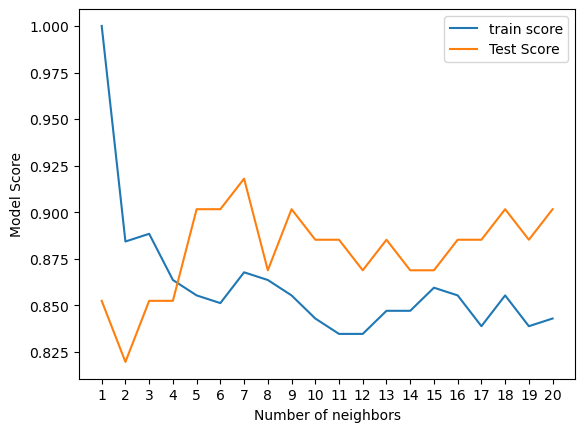

In [56]:
plt.plot(neighbors,train_scores,label ="train score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))
plt.legend()

print(f"Maximum test score : {max(test_scores)*100:.2f}")

#### Hyperparameter tuning randomized CV

In [46]:
#Create a hyperparameter grid for logistic regression
#logspace = logarithmically spaced vectors.
log_reg_grid = {"C": np.logspace(-4,4,20), "solver":["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],
"min_samples_split":np.arange(2,20,2), "min_samples_leaf": np.arange(1,20,2)
}

In [40]:
#Using randomized search CV
#Tune logistic regression
np.random.seed(42)

rand_search_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv = 5,n_iter= 20,verbose=True)#It is going to cross validate 5 times for 20 regs
rand_search_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rand_search_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [42]:
rand_search_log_reg.score(X_test,y_test)

0.8524590163934426

In [47]:
np.random.seed(42)
rand_forest_log_reg = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv = 5, n_iter=20,verbose = True)
rand_forest_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [48]:
rand_forest_log_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [50]:
rand_forest_log_reg.score(X_test,y_test)

0.8688524590163934

In [51]:
#Hyperparameter tuning using grid search cv
log_reg_grid = {"C": np.logspace(-4,4,30), "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv = 5,verbose=True)

In [52]:
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [68]:
y_preds_knn = knn_model.predict(X_test)
y_preds_log = gs_log_reg.predict(X_test)

In [64]:
y_preds_knn

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

*ROC

*Confudion matrix

*Classification report

*Precision 

*Recall

*f1-score

In [62]:
#Evaluating our model
#confusion matrix

def plot_conf_matrix(y_test,y_preds):
    fig , ax = plt.subplots(figsize = (3,3))
    #Creating a heatmap with the confusion matrix
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

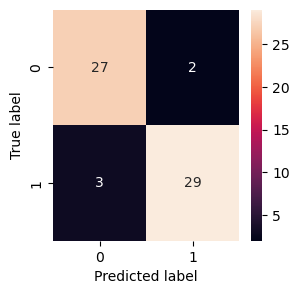

In [65]:
plot_conf_matrix(y_test,y_preds_knn)

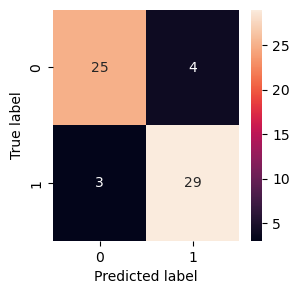

In [69]:
plot_conf_matrix(y_test,y_preds_log )

/home/pranavajay/anaconda3/envs/mlEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


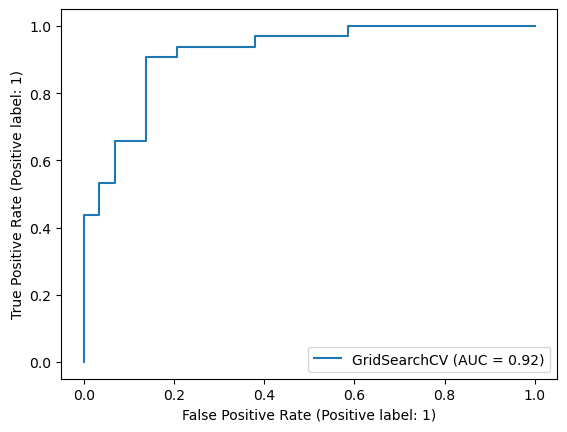

In [71]:
#Roc curve
plot_roc_curve(gs_log_reg,X_test,y_test)

/home/pranavajay/anaconda3/envs/mlEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


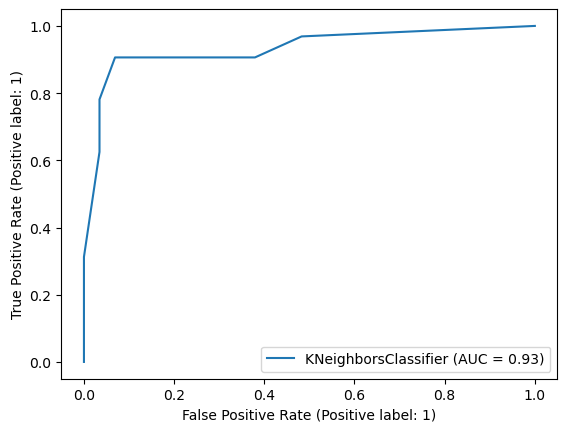

In [72]:
plot_roc_curve(knn_model,X_test,y_test)

In [74]:
#Classification report 
print(classification_report(y_test,y_preds_knn))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [75]:
print(classification_report(y_test,y_preds_log))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [76]:
#Precision, recall and f1 score using cross validation


In [77]:
#Check best hyperparams
lg_clf = LogisticRegression(C=gs_log_reg.best_params_['C'],solver = gs_log_reg.best_params_['solver'])

In [78]:
#Cross validated accuracy for logistic reg
cv_acc = cross_val_score(lg_clf,X,y,scoring='accuracy',cv=5)

In [80]:
#Average accuracy 
cv_acc = np.mean(cv_acc)
cv_acc

0.7785792349726776

In [82]:
#Cross validation on knn
cv_acc = cross_val_score(knn_model,X,y,scoring='accuracy',cv=5)
cv_acc = np.mean(cv_acc)
cv_acc

0.6404918032786886

In [86]:
#Precision
cv_prec = cross_val_score(lg_clf,X,y,scoring='precision',cv=5)
cv_prec = np.mean(cv_prec)
cv_prec


0.7659440559440559

In [87]:
cv_prec = cross_val_score(knn_model,X,y,scoring='precision',cv=5)
cv_prec = np.mean(cv_prec)
cv_prec

0.660528213089883

In [89]:
#Cross validated recall

cv_prec = cross_val_score(lg_clf,X,y,scoring='recall',cv=5)
cv_prec = np.mean(cv_prec)
cv_prec

0.8606060606060607

In [90]:
cv_prec = cross_val_score(knn_model,X,y,scoring='recall',cv=5)
cv_prec = np.mean(cv_prec)
cv_prec

0.703030303030303

In [91]:
#Cross validated f1 score
cv_prec = cross_val_score(lg_clf,X,y,scoring='f1',cv=5)
cv_prec = np.mean(cv_prec)
cv_prec


0.8093924742998071

In [92]:
cv_prec = cross_val_score(knn_model,X,y,scoring='f1',cv=5)
cv_prec = np.mean(cv_prec)
cv_prec

0.6797188300919644